Enhancing Images: 100%|██████████| 262/262 [00:17<00:00, 15.06it/s]


📷 Original Image:


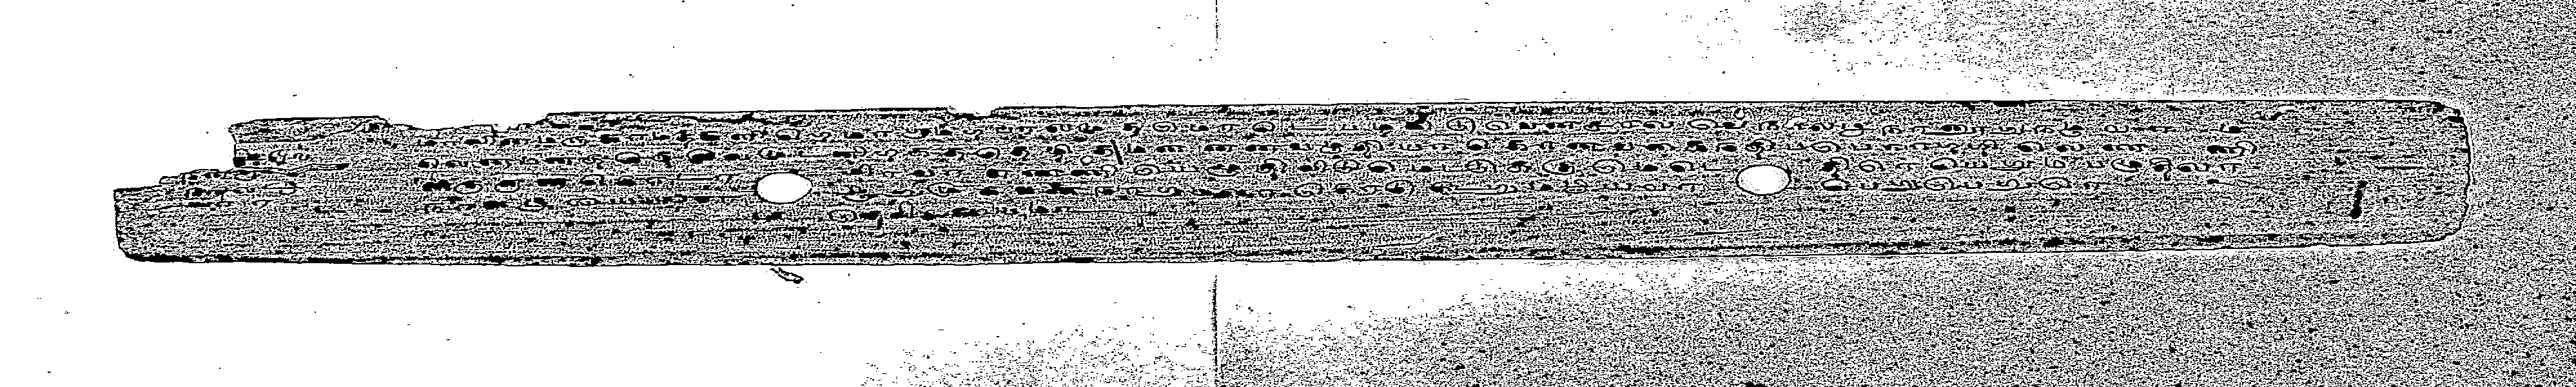


✨ Enhanced Image:


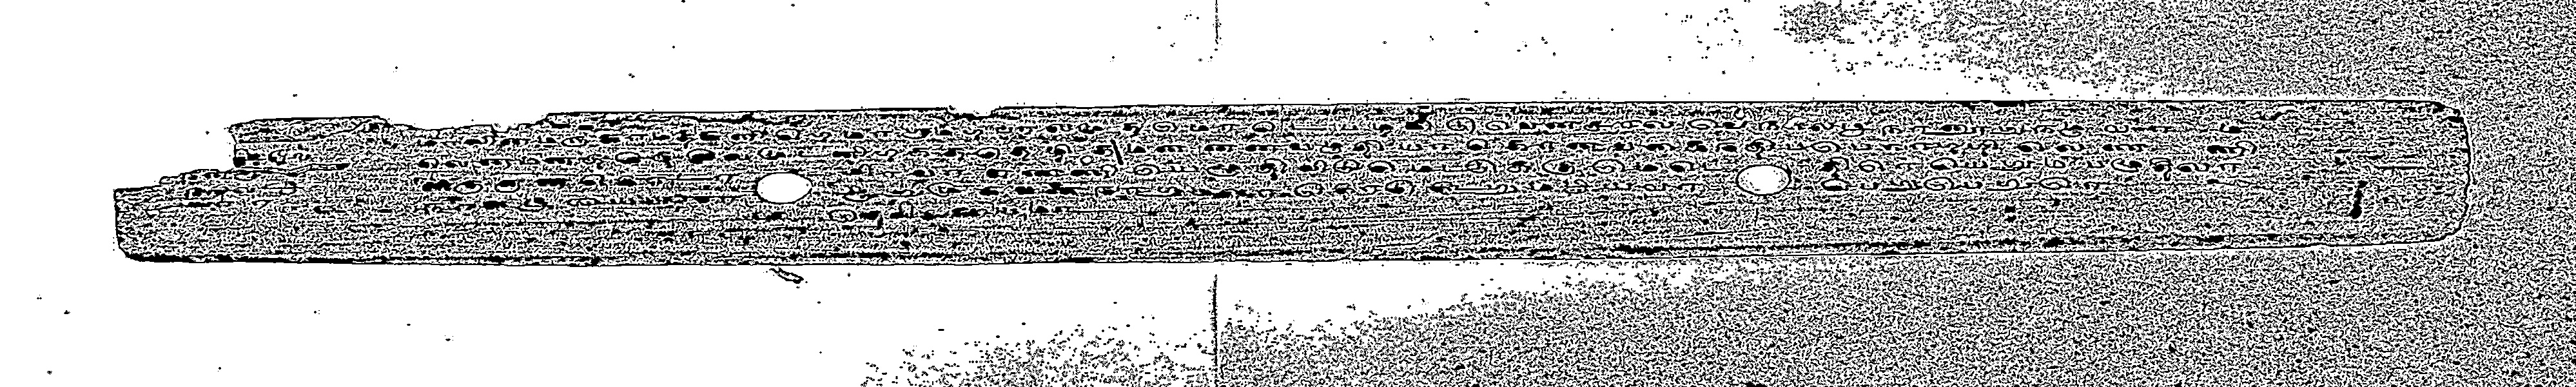

✅ All images enhanced and saved in: enhanced_images


In [1]:
import os
import cv2
import numpy as np
import zipfile
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

# Define paths
zip_path = "restored_scripts.zip"  # Corrected path
extract_folder = "restored_scripts"
enhanced_folder = "enhanced_images"

# Unzip the folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Create a folder to save enhanced images
os.makedirs(enhanced_folder, exist_ok=True)

# Get all image files
image_files = sorted([f for f in os.listdir(extract_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Function to enhance image quality
def enhance_image(image_path, save_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Denoise image
    gray = cv2.GaussianBlur(gray, (3,3), 0)  # Gaussian blur
    gray = cv2.medianBlur(gray, 3)  # Median filter

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)

    # Sharpening Filter
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpened = cv2.filter2D(enhanced, -1, sharpen_kernel)

    # Adaptive Thresholding for better text extraction
    processed = cv2.adaptiveThreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 10)

    # Save enhanced image
    cv2.imwrite(save_path, processed)

    return processed

# Process all images
for img_name in tqdm(image_files, desc="Enhancing Images"):
    img_path = os.path.join(extract_folder, img_name)
    save_path = os.path.join(enhanced_folder, img_name)
    
    enhanced_img = enhance_image(img_path, save_path)

# Display a sample image before and after enhancement
sample_img = os.path.join(extract_folder, image_files[0])
sample_enhanced = os.path.join(enhanced_folder, image_files[0])

# Display images in Jupyter Lab
print("📷 Original Image:")
display(Image.open(sample_img))

print("\n✨ Enhanced Image:")
display(Image.open(sample_enhanced))

print("✅ All images enhanced and saved in:", enhanced_folder)

Enhancing Images: 100%|██████████| 262/262 [00:27<00:00,  9.58it/s]


📷 Original Image:


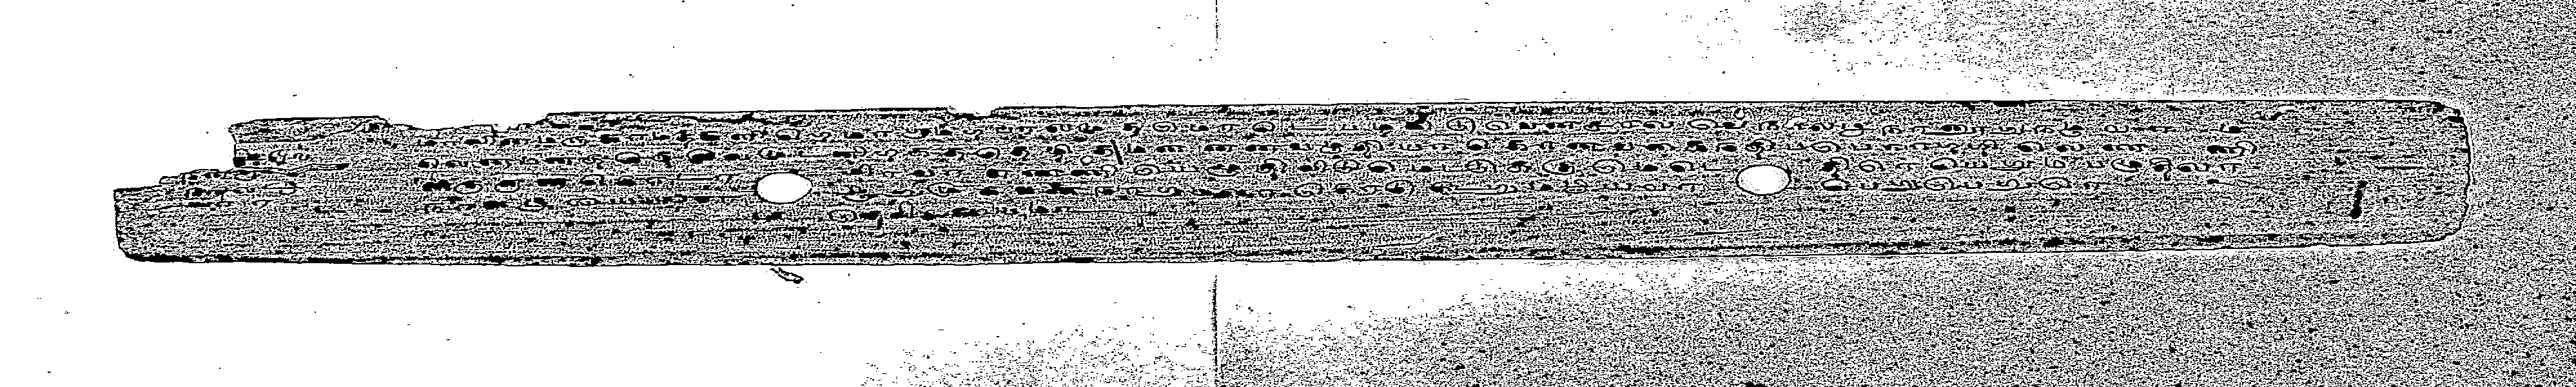


✨ Enhanced Image:


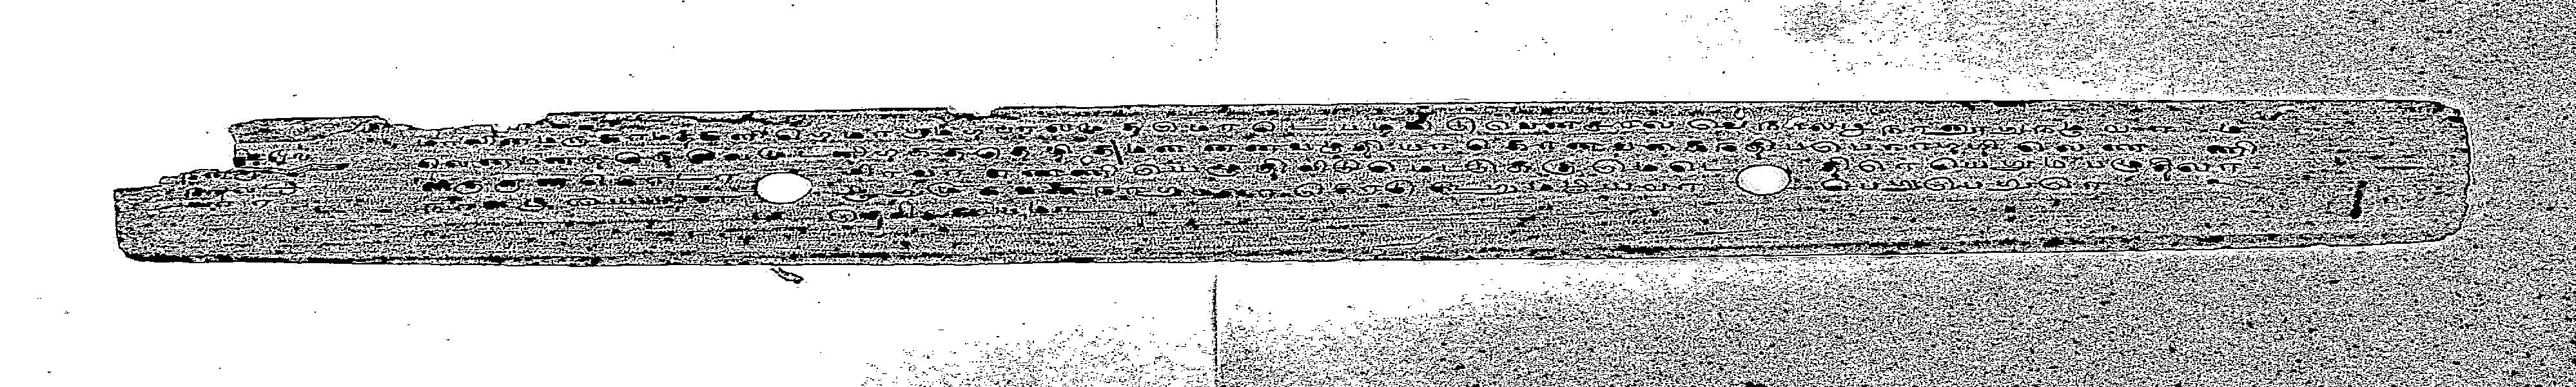

✅ All images enhanced and saved in: enhanced_images


In [2]:
import os
import cv2
import numpy as np
import zipfile
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

# Define paths
zip_path = "restored_scripts.zip"  # Corrected path
extract_folder = "restored_scripts"
enhanced_folder = "enhanced_images"

# Unzip the folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Create a folder to save enhanced images
os.makedirs(enhanced_folder, exist_ok=True)

# Get all image files
image_files = sorted([f for f in os.listdir(extract_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Function to enhance image quality with reduced grayscale
def enhance_image(image_path, save_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert to LAB color space to enhance brightness & contrast
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization) on the lightness channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)

    # Merge back and convert to BGR
    lab = cv2.merge((l, a, b))
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Light sharpening without too much grayscale
    sharpen_kernel = np.array([[0, -0.5, 0],
                               [-0.5, 3, -0.5],
                               [0, -0.5, 0]])
    sharpened = cv2.filter2D(enhanced, -1, sharpen_kernel)

    # Save enhanced image
    cv2.imwrite(save_path, sharpened)

    return sharpened

# Process all images
for img_name in tqdm(image_files, desc="Enhancing Images"):
    img_path = os.path.join(extract_folder, img_name)
    save_path = os.path.join(enhanced_folder, img_name)
    
    enhanced_img = enhance_image(img_path, save_path)

# Display a sample image before and after enhancement
sample_img = os.path.join(extract_folder, image_files[0])
sample_enhanced = os.path.join(enhanced_folder, image_files[0])

# Display images in Jupyter Lab
print("📷 Original Image:")
display(Image.open(sample_img))

print("\n✨ Enhanced Image:")
display(Image.open(sample_enhanced))

print("✅ All images enhanced and saved in:", enhanced_folder)

📂 Files already extracted!
📸 262 images found. Processing...


Enhancing Images: 100%|██████████| 262/262 [00:24<00:00, 10.68it/s]


✅ All images enhanced and saved in: enhanced_images


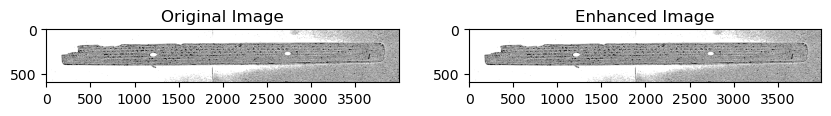

In [4]:
import os
import cv2
import numpy as np
import zipfile
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define paths
zip_path = "restored_scripts.zip"  # Ensure the zip file is in the correct directory
extract_folder = "restored_scripts"
enhanced_folder = "enhanced_images"

# Step 1: Unzip the folder
if not os.path.exists(extract_folder):
    print("Extracting ZIP file...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print("✅ Extraction complete!")
else:
    print("📂 Files already extracted!")

# Step 2: Create a folder to save enhanced images
os.makedirs(enhanced_folder, exist_ok=True)

# Get all image files
image_files = sorted([f for f in os.listdir(extract_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

if not image_files:
    print("❌ No images found in the extracted folder!")
else:
    print(f"📸 {len(image_files)} images found. Processing...")

# Function to enhance image quality
def enhance_image(image_path, save_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if img is None:
        print(f"❌ Error reading {image_path}")
        return None

    # Convert to grayscale (not too much to retain text visibility)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Bilateral Filtering (preserves edges while reducing noise)
    denoised = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)

    # Adaptive Histogram Equalization for better contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)

    # Sharpening to enhance text clarity
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpened = cv2.filter2D(enhanced, -1, sharpen_kernel)

    # Save enhanced image
    cv2.imwrite(save_path, sharpened)

    return sharpened

# Step 3: Process all images
for img_name in tqdm(image_files, desc="Enhancing Images"):
    img_path = os.path.join(extract_folder, img_name)
    save_path = os.path.join(enhanced_folder, img_name)
    
    enhanced_img = enhance_image(img_path, save_path)

print("✅ All images enhanced and saved in:", enhanced_folder)

# Step 4: Display a sample before & after
sample_img = os.path.join(extract_folder, image_files[0])
sample_enhanced = os.path.join(enhanced_folder, image_files[0])

original = cv2.imread(sample_img, cv2.IMREAD_GRAYSCALE)
enhanced = cv2.imread(sample_enhanced, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(enhanced, cmap='gray')
plt.title("Enhanced Image")

plt.show()

📸 262 images found. Applying binarization...


Binarizing Images: 100%|██████████| 262/262 [00:16<00:00, 16.09it/s]


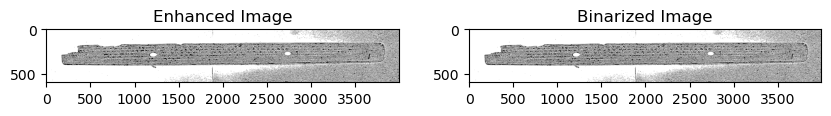

✅ Adaptive Binarization complete! Images saved in: binarized_images


In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define paths
enhanced_folder = "enhanced_images"  # Folder containing already enhanced images
binarized_folder = "binarized_images"  # Output folder for binarized images

# Create output folder
os.makedirs(binarized_folder, exist_ok=True)

# Get all image files from enhanced folder
image_files = sorted([f for f in os.listdir(enhanced_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

if not image_files:
    print("❌ No enhanced images found!")
else:
    print(f"📸 {len(image_files)} images found. Applying binarization...")

# Function to binarize image using Adaptive Thresholding
def binarize_image(image_path, save_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"❌ Error reading {image_path}")
        return None

    # Apply Adaptive Gaussian Thresholding
    binarized = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, blockSize=15, C=10)

    # Save the binarized image
    cv2.imwrite(save_path, binarized)

    return binarized

# Process all enhanced images
for img_name in tqdm(image_files, desc="Binarizing Images"):
    img_path = os.path.join(enhanced_folder, img_name)
    save_path = os.path.join(binarized_folder, img_name)
    
    binarize_image(img_path, save_path)

# Display a sample image before and after binarization
sample_img = os.path.join(enhanced_folder, image_files[0])
sample_binarized = os.path.join(binarized_folder, image_files[0])

original = cv2.imread(sample_img, cv2.IMREAD_GRAYSCALE)
binarized = cv2.imread(sample_binarized, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Enhanced Image")

plt.subplot(1, 2, 2)
plt.imshow(binarized, cmap='gray')
plt.title("Binarized Image")

plt.show()

print("✅ Adaptive Binarization complete! Images saved in:", binarized_folder)

In [8]:
pip install opencv-python pytesseract tqdm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 192.7 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tesseract-ocr-tam -y


Usage:   
  /opt/intel/oneapi/intelpython/envs/pytorch-gpu/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/intel/oneapi/intelpython/envs/pytorch-gpu/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/intel/oneapi/intelpython/envs/pytorch-gpu/bin/python -m pip install [options] [-e] <vcs project url> ...
  /opt/intel/oneapi/intelpython/envs/pytorch-gpu/bin/python -m pip install [options] [-e] <local project path> ...
  /opt/intel/oneapi/intelpython/envs/pytorch-gpu/bin/python -m pip install [options] <archive url/path> ...

no such option: -y
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Input & Output Directories
binarized_folder = "binarized_images"  # Folder containing binarized images
edges_folder = "edge_detected_images"  # Output folder

# Create output folder if it doesn’t exist
os.makedirs(edges_folder, exist_ok=True)

# Function to detect edges
def detect_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"⚠️ Error reading {image_path}")
        return None
    
    edges = cv2.Canny(img, 50, 150)  # Canny Edge Detection
    return edges

# Process all images
for img_name in tqdm(os.listdir(binarized_folder)):
    img_path = os.path.join(binarized_folder, img_name)
    
    # Detect edges
    edges = detect_edges(img_path)
    if edges is not None:
        output_path = os.path.join(edges_folder, img_name)
        cv2.imwrite(output_path, edges)

print("✅ Edge detection completed! Check the 'edge_detected_images' folder.")

  1%|          | 3/263 [00:00<00:08, 29.30it/s]

⚠️ Error reading binarized_images/.ipynb_checkpoints


100%|██████████| 263/263 [00:13<00:00, 19.17it/s]

✅ Edge detection completed! Check the 'edge_detected_images' folder.


In [2]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Input & Output Directories
binarized_folder = "binarized_images"   # Folder containing binarized images
edges_folder = "edge_detected_images"   # Output folder for normal edges
new_edges_folder = "new_edge"           # Output folder for inverted edges

# Create output folders if they don’t exist
os.makedirs(edges_folder, exist_ok=True)
os.makedirs(new_edges_folder, exist_ok=True)

# Function to detect and invert edges
def detect_and_invert_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"⚠️ Error reading {image_path}")
        return None, None
    
    edges = cv2.Canny(img, 50, 150)  # Canny Edge Detection
    inverted_edges = cv2.bitwise_not(edges)  # Invert the edges

    return edges, inverted_edges

# Process all images
for img_name in tqdm(os.listdir(binarized_folder)):
    img_path = os.path.join(binarized_folder, img_name)
    
    # Detect and invert edges
    edges, inverted_edges = detect_and_invert_edges(img_path)
    if edges is not None and inverted_edges is not None:
        cv2.imwrite(os.path.join(edges_folder, img_name), edges)  # Save normal edges
        cv2.imwrite(os.path.join(new_edges_folder, img_name), inverted_edges)  # Save inverted edges

print("✅ Edge detection and inversion completed! Check 'edge_detected_images' and 'new_edge' folders.")


  1%|          | 2/263 [00:00<00:14, 17.42it/s]

⚠️ Error reading binarized_images/.ipynb_checkpoints


100%|██████████| 263/263 [00:18<00:00, 14.29it/s]

✅ Edge detection and inversion completed! Check 'edge_detected_images' and 'new_edge' folders.


In [3]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Input & Output Directories
binarized_folder = "binarized_images"    # Folder with binarized images
denoised_folder = "denoised_images"      # Output folder for noise-free images

# Create output folder if it doesn’t exist
os.makedirs(denoised_folder, exist_ok=True)

# Function to reduce noise
def denoise_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"⚠️ Error reading {image_path}")
        return None

    # Apply Non-Local Means Denoising (best for text images)
    denoised = cv2.fastNlMeansDenoising(img, None, h=30, templateWindowSize=7, searchWindowSize=21)

    # Morphological Opening (Removes small noise particles)
    kernel = np.ones((2, 2), np.uint8)
    morph = cv2.morphologyEx(denoised, cv2.MORPH_OPEN, kernel)

    return morph

# Process all images
for img_name in tqdm(os.listdir(binarized_folder)):
    img_path = os.path.join(binarized_folder, img_name)
    
    denoised_img = denoise_image(img_path)
    if denoised_img is not None:
        cv2.imwrite(os.path.join(denoised_folder, img_name), denoised_img)

print("✅ Noise reduction completed! Check 'denoised_images' folder.")

  0%|          | 0/263 [00:00<?, ?it/s]

⚠️ Error reading binarized_images/.ipynb_checkpoints


100%|██████████| 263/263 [01:37<00:00,  2.68it/s]

✅ Noise reduction completed! Check 'denoised_images' folder.


In [6]:
import cv2
import os
import numpy as np
from skimage.restoration import denoise_tv_chambolle
from tqdm import tqdm

# Input & Output Directories
binarized_folder = "binarized_images"    # Folder with binarized images
denoised_folder = "denoised_images"      # Output folder for improved noise-free images

# Create output folder if it doesn’t exist
os.makedirs(denoised_folder, exist_ok=True)

# Function to reduce noise using Median Filtering & Total Variation Denoising
def denoise_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"⚠️ Error reading {image_path}")
        return None

    # Step 1: Median Filtering (removes small noise while keeping edges)
    median_filtered = cv2.medianBlur(img, 3)

    # Step 2: Total Variation Denoising (reduces noise while keeping text intact)
    tv_denoised = denoise_tv_chambolle(median_filtered, weight=0.1)

    # Convert to 8-bit format for saving
    tv_denoised = (tv_denoised * 255).astype(np.uint8)

    return tv_denoised

# Process all images
for img_name in tqdm(os.listdir(binarized_folder)):
    img_path = os.path.join(binarized_folder, img_name)
    
    denoised_img = denoise_image(img_path)
    if denoised_img is not None:
        cv2.imwrite(os.path.join(denoised_folder, img_name), denoised_img)

print("✅ Noise reduction completed! Check 'denoised_images' folder.")


  0%|          | 0/263 [00:00<?, ?it/s]

⚠️ Error reading binarized_images/.ipynb_checkpoints


100%|██████████| 263/263 [05:16<00:00,  1.20s/it]

✅ Noise reduction completed! Check 'denoised_images' folder.


In [5]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 159.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2
import os
from tqdm import tqdm

# Define input and output folders
input_folder = "denoised_images"  # Folder containing denoised images
output_folder = "smoothed_images"  # Folder to save the smoothed images

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Apply Gaussian Blur
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_name}, unable to read the image.")
        continue

    # Apply Gaussian Blur (you can adjust the kernel size)
    smoothed_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Save the output image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, smoothed_img)

print("Gaussian Blur applied to all images successfully!")


 40%|████      | 106/263 [00:03<00:04, 37.65it/s]

Skipping .ipynb_checkpoints, unable to read the image.


100%|██████████| 263/263 [00:08<00:00, 32.50it/s]

Gaussian Blur applied to all images successfully!


In [8]:
import cv2
import os
from tqdm import tqdm

# Define input and output folders
input_folder = "denoised_images"  # Folder containing denoised images
output_folder = "smoothed_images"  # Folder to save the smoothed images

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Apply Bilateral Filtering
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_name}, unable to read the image.")
        continue

    # Apply Bilateral Filter (d = 9, sigmaColor = 75, sigmaSpace = 75)
    smoothed_img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Save the output image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, smoothed_img)

print("Bilateral Filtering applied to all images successfully!")


 39%|███▉      | 102/263 [00:06<00:08, 18.48it/s]

Skipping .ipynb_checkpoints, unable to read the image.


100%|██████████| 263/263 [00:15<00:00, 16.53it/s]

Bilateral Filtering applied to all images successfully!


In [9]:
import cv2
import os
from tqdm import tqdm

# Define input and output folders
input_folder = "denoised_images"  # Folder containing denoised images
output_folder = "smoothed_images"  # Folder to save the smoothed images

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Apply Median Blurring for Smoothing
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_name}, unable to read the image.")
        continue

    # Apply Median Blurring
    smoothed_img = cv2.medianBlur(img, 3)  # Kernel size 3 (adjustable)

    # Save the output image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, smoothed_img)

print("Smoothing using Median Blurring applied to all images successfully!")

 40%|████      | 106/263 [00:03<00:04, 32.87it/s]

Skipping .ipynb_checkpoints, unable to read the image.


100%|██████████| 263/263 [00:07<00:00, 33.48it/s]

Smoothing using Median Blurring applied to all images successfully!


In [10]:
import cv2
import os
from tqdm import tqdm

# Define input and output folders
input_folder = "denoised_images"  # Folder containing denoised images
output_folder = "sift_images"  # Folder to save images with SIFT keypoints

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Process each image in the input folder
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_name}, unable to read the image.")
        continue

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)

    # Draw keypoints on the image
    sift_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the output image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, sift_img)

print("SIFT keypoints detected and saved successfully!")

 38%|███▊      | 99/263 [01:03<01:33,  1.75it/s]

Skipping .ipynb_checkpoints, unable to read the image.


100%|██████████| 263/263 [02:47<00:00,  1.57it/s]

SIFT keypoints detected and saved successfully!


In [11]:
import cv2
import os
from tqdm import tqdm

# Define input and output folders
input_folder = "denoised_images"  # Folder containing denoised images
output_folder = "sift_images2"  # Folder to save images with SIFT keypoints

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Scale factor for increasing keypoint circle size
scale_factor = 2.0  # Adjust this value to increase/decrease circle size

# Process each image in the input folder
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_name}, unable to read the image.")
        continue

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)

    # Increase keypoint sizes
    for kp in keypoints:
        kp.size *= scale_factor  # Increase size of each keypoint

    # Draw keypoints with increased circle size
    sift_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the output image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, sift_img)

print("SIFT keypoints detected with increased circle size and saved successfully!")


 38%|███▊      | 99/263 [01:04<01:45,  1.56it/s]

Skipping .ipynb_checkpoints, unable to read the image.


100%|██████████| 263/263 [02:53<00:00,  1.52it/s]

SIFT keypoints detected with increased circle size and saved successfully!


In [12]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# Define folders
input_folder = "denoised_images"
output_folder = "sift_filtered_images"

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Initialize SIFT
sift = cv2.SIFT_create()

# Process each image in the folder
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_name}, unable to read.")
        continue

    # Step 1: Noise Suppression
    img = cv2.bilateralFilter(img, 9, 75, 75)  # Smooth while preserving edges

    # Step 2: Morphological Opening (Removes small noise)
    kernel = np.ones((3, 3), np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)

    # Step 3: Edge Detection (Canny)
    edges = cv2.Canny(img, 50, 150)

    # Step 4: Contour Detection
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Create a mask from the largest contours (Text likely has large contours)
    mask = np.zeros_like(img)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Step 6: Apply mask to filter out noise
    refined_img = cv2.bitwise_and(img, img, mask=mask)

    # Step 7: Detect SIFT Keypoints on refined image
    keypoints, descriptors = sift.detectAndCompute(refined_img, None)

    # Step 8: Draw Keypoints
    sift_img = cv2.drawKeypoints(refined_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the output image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, sift_img)

print("SIFT applied with noise reduction and text feature emphasis!")


 38%|███▊      | 99/263 [01:04<01:51,  1.48it/s]

Skipping .ipynb_checkpoints, unable to read.


100%|██████████| 263/263 [02:43<00:00,  1.61it/s]

SIFT applied with noise reduction and text feature emphasis!


In [13]:
import cv2
import numpy as np
import pytesseract
import os
from tqdm import tqdm

# Define folders
input_folder = "denoised_images"  # Input folder containing denoised images
output_folder = "latest_output"   # Output folder for processed images

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the folder
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_name}, unable to read.")
        continue

    # Step 1: Bilateral Filter - Reduces noise while preserving edges
    img_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Step 2: Morphological Opening - Removes small noise
    kernel = np.ones((3, 3), np.uint8)
    img_opened = cv2.morphologyEx(img_filtered, cv2.MORPH_OPEN, kernel, iterations=1)

    # Step 3: Edge Detection (Canny)
    edges = cv2.Canny(img_opened, 50, 150)

    # Step 4: Find Contours in the Edge Image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Create Mask from the Largest Contours (Assuming text has significant contours)
    mask = np.zeros_like(img_opened)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Step 6: Refine Image by Masking (Keep text areas, remove background noise)
    refined_img = cv2.bitwise_and(img_opened, img_opened, mask=mask)

    # Step 7: Optional Binarization (Adaptive Threshold for OCR Enhancement)
    binarized = cv2.adaptiveThreshold(
        refined_img, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 31, 10
    )

    # Step 8: Save the Processed Image
    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, binarized)

print("Processing complete! Processed images saved in 'latest_output' folder.")

 38%|███▊      | 101/263 [00:15<00:18,  8.95it/s]

Skipping .ipynb_checkpoints, unable to read.


100%|██████████| 263/263 [00:37<00:00,  7.00it/s]

Processing complete! Processed images saved in 'latest_output' folder.
